<a href="https://colab.research.google.com/github/HrishitTambi/QML-HEP-GSOC-2023/blob/main/QML_HEP_GSoC_2023_Task_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install pennylane
!pip install cirq

from IPython.display import clear_output
clear_output()

In [48]:
import pennylane as qml
from pennylane import numpy as np

# Task I: Quantum Computing Part

## 1) Implement a simple quantum operation with Cirq or Pennylane


In [49]:
dev = qml.device("default.qubit", wires=5)

In [50]:
@qml.qnode(dev)
def circuit():
    # Apply Hadamard operation on every qubit
    for i in range(5):
        qml.Hadamard(wires=i)
    # Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    for i in range(4):
        qml.CNOT(wires=[i,i+1])
    # Apply SWAP (0, 4)
    qml.SWAP(wires=[0, 4])
    # Apply Rotate X with pi/2 on any qubit
    qml.RX(np.pi/2, wires=0)

    # Return the expectation value of Pauli-Z on all qubits
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(5)]

In [51]:
# Plot the circuit 
print(qml.draw(circuit)())

0: ──H─╭●──────────╭SWAP──RX(1.57)─┤  <Z>
1: ──H─╰X─╭●───────│───────────────┤  <Z>
2: ──H────╰X─╭●────│───────────────┤  <Z>
3: ──H───────╰X─╭●─│───────────────┤  <Z>
4: ──H──────────╰X─╰SWAP───────────┤  <Z>


## 2) Implement a second circuit with a framework of your choice.

In [52]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

                   ┌──┐
0: ───H─────────────×────────────────────────
                    │
1: ───Rx(0.333π)────×────────────────────────
                    │
2: ───H─────────────┼×───────────────────────
                    ││
3: ───H─────────────┼×───────────────────────
                    ││
4: ───H─────────────@┼────H───M('result1')───
                     │
5: ───H──────────────@────H───M('result2')───
                   └──┘
Probability of measuring control0 qubit in the |0⟩ state: 0.741


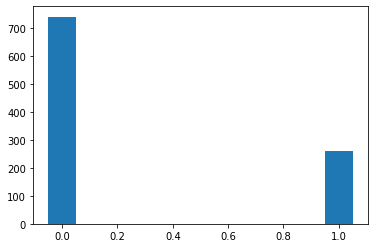

Probability of measuring control1 qubit in the |0⟩ state: 1.0


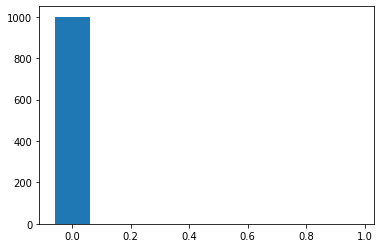

In [54]:
qubits = cirq.LineQubit.range(4)
control0 = cirq.LineQubit(4)
control1 = cirq.LineQubit(5)

circuit = cirq.Circuit(
    # Apply a Hadmard gate to the first qubit
    cirq.H(qubits[0]),
    # Rotate the second qubit by pi/3 around X
    cirq.rx(np.pi/3)(qubits[1]),
    # Apply Hadamard gate to the third and fourth qubit
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    # Perform a swap test between the states |q1 q2> and |q3 q4>
    cirq.H(control0),
    cirq.H(control1),
    cirq.CSWAP(control0, qubits[0], qubits[1]),
    cirq.CSWAP(control1, qubits[2], qubits[3]),
    cirq.H(control0),
    cirq.H(control1),
    cirq.measure(control0, key='result1'),
    cirq.measure(control1, key='result2')
)

print(circuit)
sim=cirq.Simulator()
samples=sim.run(circuit, repetitions=1000)
# Plot the probability of measuring the state in the |0⟩ state
print("Probability of measuring control0 qubit in the |0⟩ state:", samples.histogram(key="result1")[0]/1000)
data = samples.measurements['result1'].reshape(1000,)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.1)
plt.show()
print("Probability of measuring control1 qubit in the |0⟩ state:", samples.histogram(key="result2")[0]/1000)
data = samples.measurements['result2'].reshape(1000,)
plt.hist(data, bins=[-0.1, 0.1, 1.2], align='mid', rwidth=0.6)
plt.show()